In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generating a Random Dataset
The valus is between 0 and 100 and the classification is based in valus under 15.
It's interessant to make all values of the array under 15 to make the algorithm understand that some columns have more weight than others.

In [32]:
min_value_change_state = 15
columns = [ "bladder", "hygiene", "energy", "hunger", "health"]

dataset = []
for i in range(2500):
  line = np.random.randint(0, 100, size=len(columns)).tolist()
  smaller_index = len(columns)
  smaller_number = 100
  if i < 950 and i % 2 == 0:
    line = np.random.randint(0, 30, size=len(columns)).tolist()
  for j in range(len(line)):
    if line[j] < smaller_number:
      smaller_index = j
      smaller_number = line[j]
  decision = columns[smaller_index] if smaller_number <= min_value_change_state else "nothing"
  line.append(decision)
  dataset.append(line)
dataset = pd.DataFrame(data=dataset, columns=columns + ["decision"])
dataset.head()

,bladder,hygiene,energy,hunger,health,decision
0,12,21,18,12,4,health
1,66,14,44,85,42,hygiene
2,17,1,3,0,28,hunger
3,53,28,83,37,54,nothing
4,26,16,21,8,22,hunger


In [33]:
dataset.loc[(dataset['bladder'] <= 15) & (dataset['hygiene'] <= 15) & (dataset['energy'] <= 15) & (dataset['hunger'] <= 15) & (dataset['health'] <= 15)]

,bladder,hygiene,energy,hunger,health,decision
118,2,15,7,10,15,bladder
342,5,0,3,13,0,hygiene
352,15,11,4,4,6,energy
372,12,1,12,8,7,hygiene
406,14,0,11,14,14,hygiene
450,7,8,4,3,1,health
502,5,10,4,8,5,energy
532,7,15,10,10,3,health
538,11,8,3,5,2,health
758,8,8,6,6,0,health


In [34]:
dataset.tail()

,bladder,hygiene,energy,hunger,health,decision
2495,44,97,82,42,85,nothing
2496,66,53,46,53,97,nothing
2497,90,65,32,65,82,nothing
2498,60,0,49,77,69,hygiene
2499,0,7,14,19,41,bladder


# Splitting dataset in train and test

In [35]:
from sklearn.model_selection import train_test_split

dataset_no_class = dataset.drop('decision', axis=1)
only_class = dataset['decision']
x_train, x_test, y_train, y_test = train_test_split(dataset_no_class, only_class, test_size=0.33)
x_train.head()

,bladder,hygiene,energy,hunger,health
1872,25,73,5,22,95
904,19,11,28,7,8
1128,61,66,26,24,6
2284,40,38,36,57,68
1637,5,75,55,13,12


In [36]:
x_train.loc[(x_train['bladder'] <= 15) & (x_train['hygiene'] <= 15) & (x_train['energy'] <= 15) & (x_train['hunger'] <= 15) & (x_train['health'] <= 15)]

,bladder,hygiene,energy,hunger,health
502,5,10,4,8,5
758,8,8,6,6,0
342,5,0,3,13,0
372,12,1,12,8,7
352,15,11,4,4,6
450,7,8,4,3,1
118,2,15,7,10,15
780,3,15,4,12,13
944,15,8,13,12,10
406,14,0,11,14,14


In [37]:
len(y_train)

1675

# Creating the Decision Tree algorithm and training
Passing class_weights force the algorithm add weights to some classes.

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

clf = DecisionTreeClassifier(
    criterion='gini',
    class_weight={'bladder': 1, 'hygiene': 1, 'energy': 2, 'hunger': 3, 'health': 5},
    random_state=0)
clf.fit(x_train.values, y_train.values)

DecisionTreeClassifier(class_weight={'bladder': 1, 'energy': 2, 'health': 5,
                                     'hunger': 3, 'hygiene': 1},
                       random_state=0)

# Plotting the tree model graph

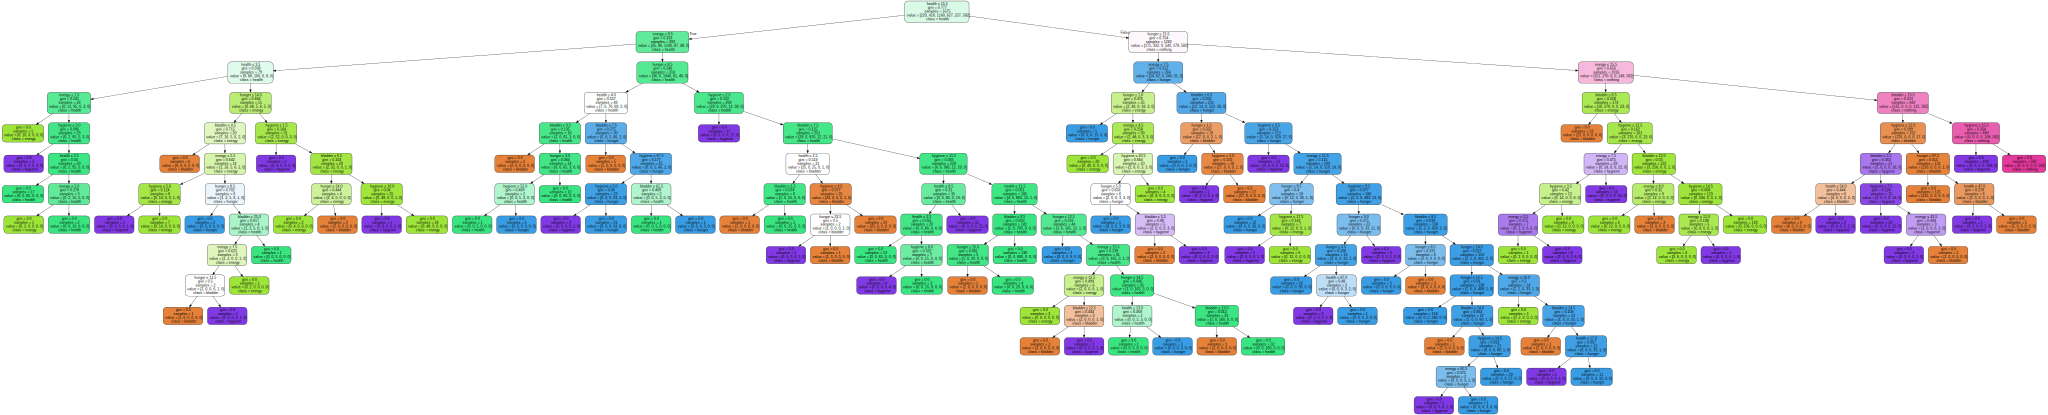

In [43]:
import graphviz


dot_data = export_graphviz(
    clf, out_file=None,
    feature_names=columns,
    class_names=clf.classes_,
    filled=True, rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph

# Accuracy of Decision Tree model

In [44]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(x_test.values)
print(classification_report(y_pred, y_test, target_names=dataset['decision'].unique()))
print(accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

      health       0.89      0.92      0.91       105
     hygiene       0.91      0.89      0.90        95
      hunger       0.92      0.93      0.92       110
     nothing       0.88      0.93      0.90        97
     bladder       0.93      0.87      0.90       124
      energy       1.00      1.00      1.00       294

    accuracy                           0.94       825
   macro avg       0.92      0.92      0.92       825
weighted avg       0.94      0.94      0.94       825

0.9406060606060606


# Exporting the model

In [23]:
import joblib

joblib.dump(clf, open('../static/models/decision_tree.joblib','wb'))

# Generating Confusion Matrix to better visualization of classes accuracies

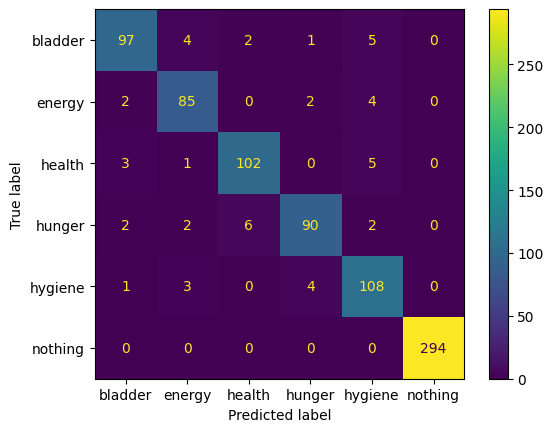

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# Creating Random Forest algorithm and training

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    criterion='gini',
    class_weight={'bladder': 1, 'hygiene': 1, 'energy': 1.2, 'hunger': 1.5, 'health': 2},
    random_state=1,
)
rfc.fit(x_train, y_train);

# Plotting the tree model graph

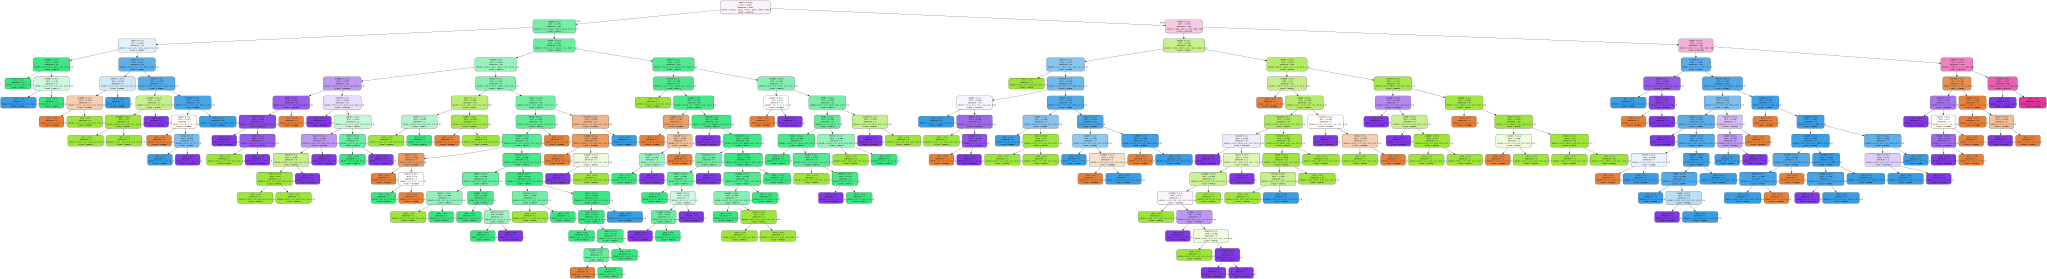

In [47]:
dot_data = export_graphviz(
    rfc.estimators_[0], out_file=None,
    feature_names=columns,
    class_names=rfc.classes_,
    filled=True, rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph

# Accuracy of Random Forest model

In [48]:
y_pred = rfc.predict(x_test)
print(classification_report(y_pred, y_test, target_names=dataset['decision'].unique()))
print(accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

      health       0.97      0.92      0.95       115
     hygiene       0.95      0.95      0.95        93
      hunger       0.95      0.93      0.94       113
     nothing       0.90      0.97      0.93        95
     bladder       0.96      0.97      0.96       115
      energy       1.00      1.00      1.00       294

    accuracy                           0.96       825
   macro avg       0.95      0.96      0.95       825
weighted avg       0.97      0.96      0.96       825

0.9648484848484848


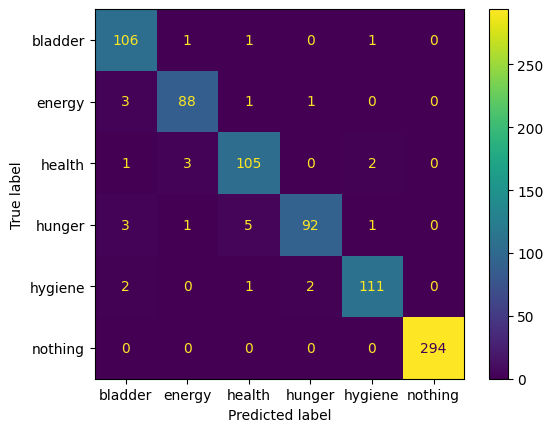

In [49]:
cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()

In [21]:
joblib.dump(rfc, open('../static/models/random_forest.pkl','wb'))